# Auto Regressor Model by Mr. Harshit Dawar
* This is the basic fundamental which should be clear before implementing RNN.
* It is the backbone of the correct/right Forecast which is required by RNN.

## Importing the required Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## Generating Sample Data without Noise

In [13]:
timeSeriesData = np.sin(0.1 * np.arange(500))

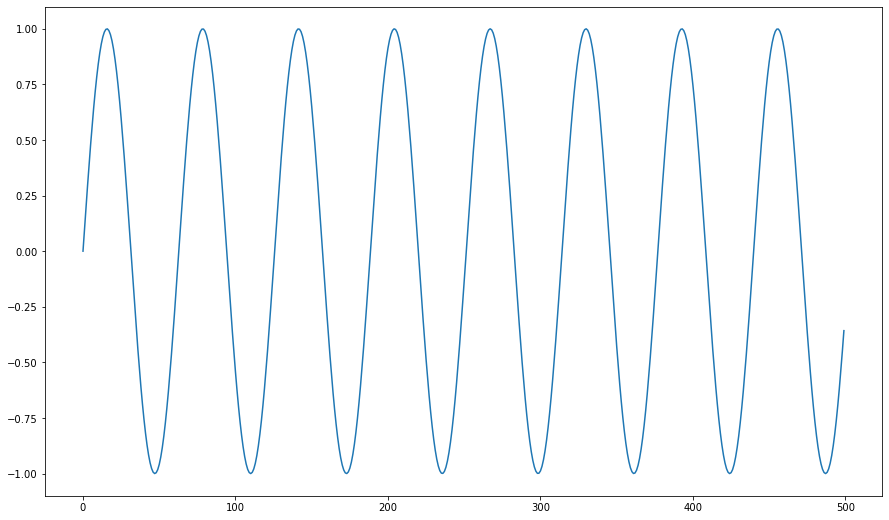

In [14]:
plt.figure(figsize = (15, 9))
plt.plot(timeSeriesData)
plt.show()

### Generating Forecast Data without Noise

In [22]:
T = 10
data = []
forecast = []

for t in range(len(timeSeriesData) - T):
    data.append(timeSeriesData[t : t + T])
    forecast.append(timeSeriesData[t + T])
    
data, forecast  = np.array(data), np.array(forecast)

In [23]:
data.shape, forecast.shape

((490, 10), (490,))

### AutoRegression Model with wrong approach of Forecast

In [29]:
inputShape = Input(shape = (T, ))
outputLayer = Dense(1)(inputShape)

model = Model(inputShape, outputLayer)
model.compile(loss = "mse", optimiser = Adam(lr = 0.001))

In [31]:
trainedModel = model.fit(data[:data.shape[0] // 2],
                         forecast[:forecast.shape[0] // 2],
                         epochs = 100,
                         validation_data = (data[-data.shape[0] // 2 : ], forecast[-forecast.shape[0] // 2 : ])
                    )

Train on 245 samples, validate on 245 samples
Epoch 1/100
245/245 [==============================] - 1s 5ms/sample - loss: 1.2720 - val_loss: 1.2193
Epoch 2/100
245/245 [==============================] - 0s 518us/sample - loss: 1.1493 - val_loss: 1.1259
Epoch 3/100
245/245 [==============================] - 0s 422us/sample - loss: 1.0636 - val_loss: 1.0475
Epoch 4/100
245/245 [==============================] - 0s 456us/sample - loss: 0.9918 - val_loss: 0.9811
Epoch 5/100
245/245 [==============================] - 0s 433us/sample - loss: 0.9284 - val_loss: 0.9186
Epoch 6/100
245/245 [==============================] - 0s 457us/sample - loss: 0.8697 - val_loss: 0.8627
Epoch 7/100
245/245 [==============================] - 0s 424us/sample - loss: 0.8181 - val_loss: 0.8130
Epoch 8/100
245/245 [==============================] - 0s 458us/sample - loss: 0.7703 - val_loss: 0.7658
Epoch 9/100
245/245 [==============================] - 0s 453us/sample - loss: 0.7266 - val_loss: 0.7230
Epoch 10/10

Epoch 78/100
245/245 [==============================] - 0s 502us/sample - loss: 2.3962e-04 - val_loss: 1.3321e-04
Epoch 79/100
245/245 [==============================] - 0s 452us/sample - loss: 8.5580e-05 - val_loss: 4.1427e-05
Epoch 80/100
245/245 [==============================] - 0s 423us/sample - loss: 2.2247e-05 - val_loss: 6.3052e-06
Epoch 81/100
245/245 [==============================] - 0s 374us/sample - loss: 3.0083e-06 - val_loss: 9.9032e-06
Epoch 82/100
245/245 [==============================] - 0s 383us/sample - loss: 2.2292e-05 - val_loss: 2.0327e-06
Epoch 83/100
245/245 [==============================] - 0s 388us/sample - loss: 6.9394e-06 - val_loss: 1.5207e-05
Epoch 84/100
245/245 [==============================] - 0s 395us/sample - loss: 1.4545e-05 - val_loss: 1.5889e-05
Epoch 85/100
245/245 [==============================] - 0s 380us/sample - loss: 8.5975e-06 - val_loss: 1.8587e-05
Epoch 86/100
245/245 [==============================] - 0s 380us/sample - loss: 1.5240e-

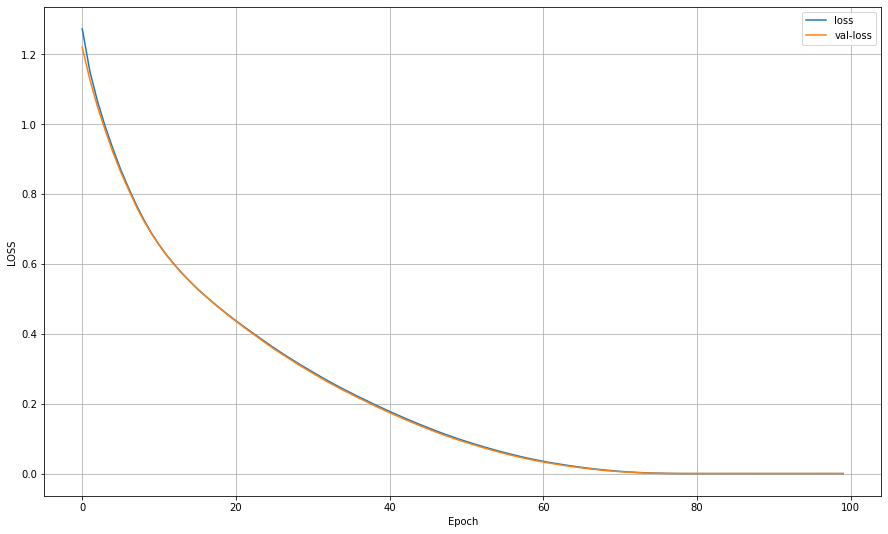

In [34]:
plt.figure(figsize = (15,9))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val-loss")
plt.xlabel("Epoch")
plt.ylabel("LOSS")
plt.legend()
plt.grid()
plt.show()

In [76]:
predictionsTargetValues = forecast[-forecast.shape[0] // 2 : ]
predictions = []

### Using the wrong approach for Forecast

In [77]:
iterator = data.shape[0] // 2
while len(predictions) < len(predictionsTargetValues):
    predictions.append(
        model.predict(data[iterator].reshape(1, -1))[0, 0]      # Converting from (10, 1) to (1, 10) becuase 10 features are expected by the Model
    )
    iterator += 1
    

In [78]:
# model.predict(data[0].reshape(1, -1))[0][0]

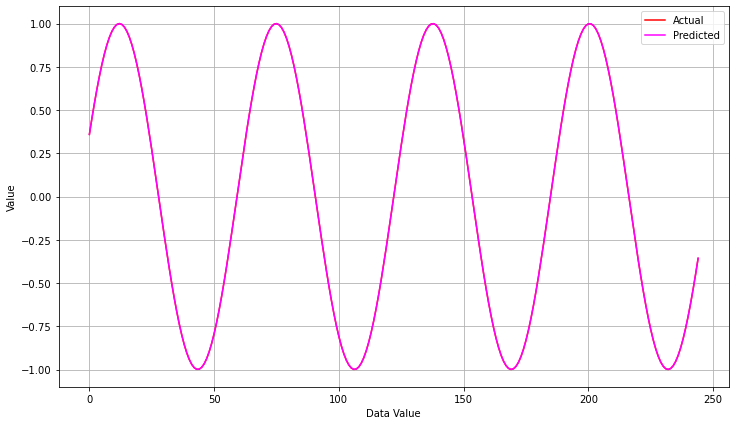

In [88]:
plt.figure(figsize = (12, 7))
plt.plot(predictionsTargetValues, label = "Actual", c = "red")
plt.plot(predictions, label = "Predicted", c = 'magenta')
plt.legend()
plt.grid()
plt.xlabel("Data Value")
plt.ylabel("Value")
plt.show()